In [ ]:
#Author: Jonathan Loyd
#Description: Python3 Using Lasso on Wine Test Data
#CSE590-12 Project 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso

In [2]:
# Get training and Testing data
train_set = pd.read_csv("wine_train.csv")
test_set = pd.read_csv("wine_test.csv")

x_train = np.array(train_set[list(train_set.columns[1:-1])])
y_train = np.array(train_set["quality"])
x_test = np.array(test_set[list(test_set.columns[1:-1])])
y_test = np.array(test_set["quality"])

In [3]:
# Conduct Lasso
alpha_val = 1

alpha_values = list()
test_values = list()
train_values = list()

for _ in range(50):
    alpha_val /= 2
    lasso = Lasso(alpha=alpha_val, max_iter=100000).fit(x_train, y_train)
    print(f'Alpha value: {alpha_val}')
    print(f'Number of features used: {np.sum(lasso.coef_ !=0)}',\
          f'Training set score: {lasso.score(x_train, y_train):.4f}',\
          f'Test set score: {lasso.score(x_test, y_test):.4f}', end='\t')
    print("")
    alpha_values.append(alpha_val)
    test_values.append(lasso.score(x_test, y_test))
    train_values.append(lasso.score(x_train, y_train))

Alpha value: 0.5
Number of features used: 2 Training set score: 0.0107 Test set score: 0.0146	
Alpha value: 0.25
Number of features used: 3 Training set score: 0.1445 Test set score: 0.1623	
Alpha value: 0.125
Number of features used: 4 Training set score: 0.1960 Test set score: 0.2232	
Alpha value: 0.0625
Number of features used: 4 Training set score: 0.2118 Test set score: 0.2436	
Alpha value: 0.03125
Number of features used: 4 Training set score: 0.2157 Test set score: 0.2500	
Alpha value: 0.015625
Number of features used: 5 Training set score: 0.2496 Test set score: 0.2926	
Alpha value: 0.0078125
Number of features used: 7 Training set score: 0.2641 Test set score: 0.3130	
Alpha value: 0.00390625
Number of features used: 7 Training set score: 0.2707 Test set score: 0.3238	
Alpha value: 0.001953125
Number of features used: 8 Training set score: 0.2728 Test set score: 0.3282	
Alpha value: 0.0009765625
Number of features used: 9 Training set score: 0.2737 Test set score: 0.3303	
Alpha

In [4]:
np.sum(lasso.coef_ !=0)

11

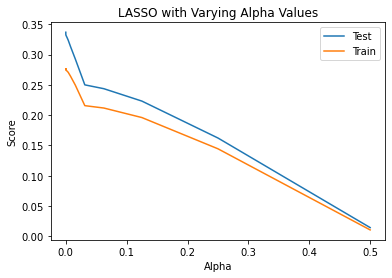

In [5]:
import matplotlib.pyplot as plt
plt.plot(alpha_values, test_values, label="Test")
plt.plot(alpha_values, train_values, label="Train")
plt.title('LASSO with Varying Alpha Values')
plt.ylabel('Score')
plt.xlabel('Alpha')
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig('LASSOfig.jpg')

In [8]:
"""Underfitting as alpha increases, similar to Ridge"""

'Underfitting as alpha increases, similar to Ridge'